In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import warnings

In [439]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

data = pd.read_csv('../data/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Задание 1

Проанализировать распределение признака 1stFlrSF и еще 3 количественных признаков, выбранных по собственному усмотрению
на предмет наличия аномальных значений.

Анализ и выводы (с обоснованиями) оформить в виде отчета.

Определение количественных признаков

In [440]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [441]:
class Constants:
    """
    Положительная асимметрия означает,
    что хвост в правой части распределения длиннее или толще.

    Отрицательная асимметрия означает,
    что хвост с левой стороны распределения длиннее или толще.
    """
    class Skew:
        negative = 'негативное'
        positive = 'положительное'
        symmetrical = 'данные достаточно симметричны'
        medium = 'умеренное'
        # данные сильно искажены
        high = 'высокое'

    """
    Mesokurtic - экстремальные значения распределения подобны
    значениям характеристики нормального распределения

    Platykurtic - данные имеют легкие хвосты или не содержат выбросов

    Leptokurtic - данные имеют тяжелые хвосты или обилие выбросов
    """
    class Kurtosis:
        leptokurtic = 'leptokurtic'
        platykurtic = 'platykurtic'
        mesokurtic = 'mesokurtic'

def fetch_kurtosis_status(kurtosis):
    if kurtosis > 0:
        return Constants.Kurtosis.leptokurtic
    elif kurtosis < 0:
        return Constants.Kurtosis.platykurtic
    else:
        return Constants.Kurtosis.mesokurtic

def fetch_skew_status(skew):
    mark = Constants.Skew.negative if skew < 0 else Constants.Skew.positive
    if -0.5 <= skew < 0.5:
        return Constants.Skew.symmetrical
    elif 0.5 <= abs(skew) <= 1:
        return f'{Constants.Skew.medium} {mark}'
    else:
        return f'{Constants.Skew.high} {mark}'

def present_info(feature):
    skew = feature.skew()
    kurtosis = feature.kurtosis()

    print(f'Смещение ({fetch_skew_status(skew=skew)}): {skew}')
    print(f'Эксцесс ({fetch_kurtosis_status(kurtosis=kurtosis)}): {kurtosis}')
    plt.figure()
    plt.title(feature.name)
    sns.distplot(feature.to_list(), kde=False, fit=sts.norm, fit_kws={"color":"red"})
    sns.distplot(feature.to_list(), kde=False, fit=sts.lognorm, fit_kws={"color":"blue"})

Смещение (высокое положительное): 1.3767566220336365
Эксцесс (leptokurtic): 5.74584148244079


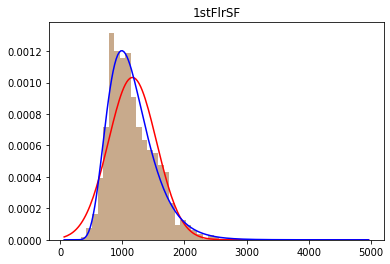

In [442]:
'''
1stFlrSF - квадратные футы первого этажа
'''
present_info(feature=numeric_features['1stFlrSF'])

Смещение (умеренное положительное): 0.8130298163023265
Эксцесс (platykurtic): -0.5534635576075795


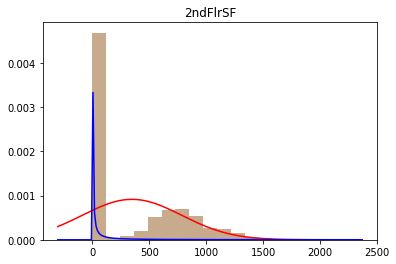

In [443]:
'''
2ndFlrSF - квадратные футы второго этажа
'''
present_info(feature=numeric_features['2ndFlrSF'])

Смещение (высокое положительное): 1.5242545490627664
Эксцесс (leptokurtic): 13.250483281984796


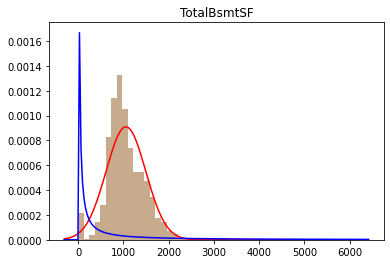

In [444]:
'''
TotalBsmtSF - общая площадь подвала в квадратных футах
'''
present_info(feature=numeric_features['TotalBsmtSF'])

Смещение (высокое положительное): 14.828373640750588
Эксцесс (leptokurtic): 223.2684989181717


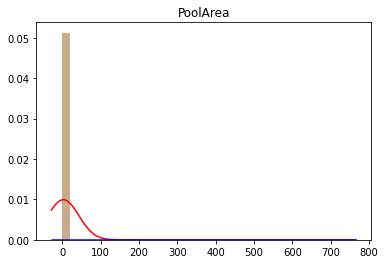

In [445]:
'''
PoolArea - площадь бассейна в квадратных футах
'''
present_info(feature=numeric_features['PoolArea'])


### Задание 2
Попытаться обосновать стратегию обработки выбросов для всех анализируемых столбцов.

Анализ и выводы (с обоснованиями) оформить в виде отчета.

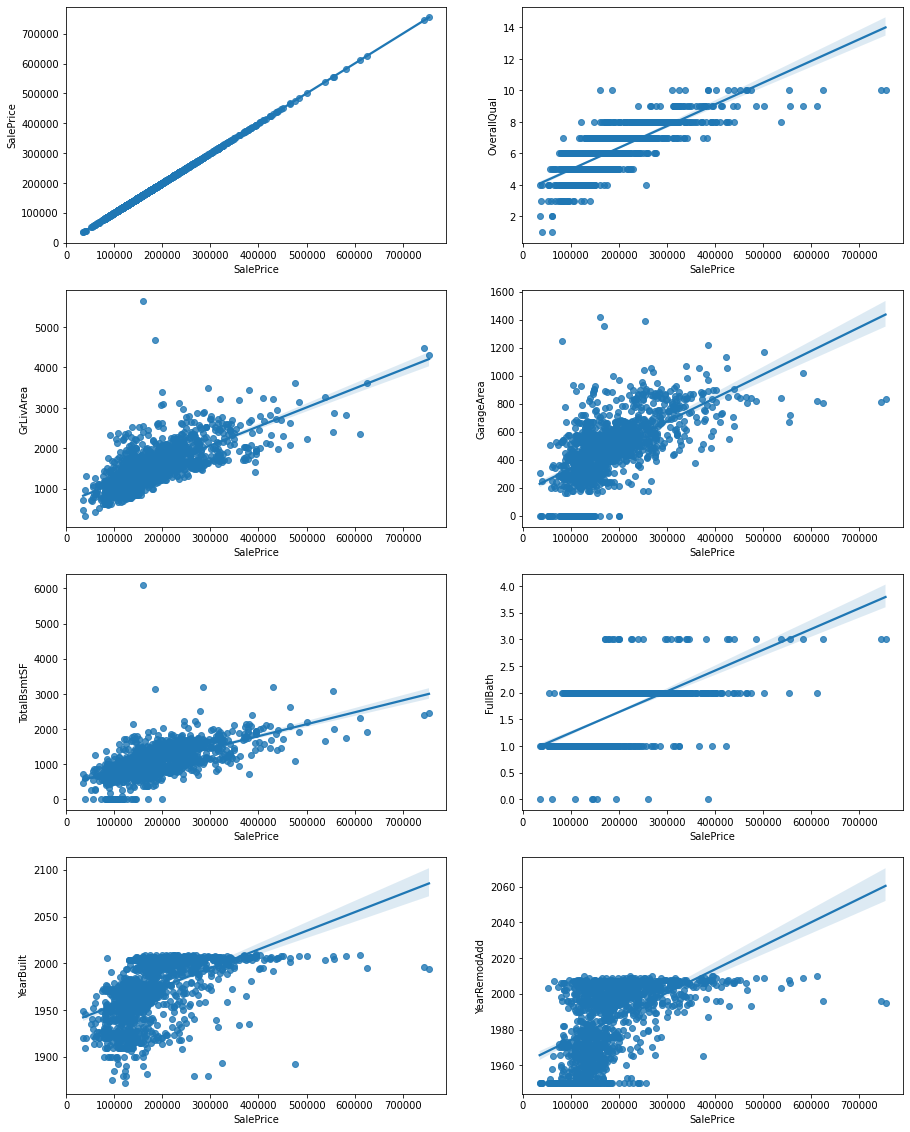

In [446]:
'''
SalePrice - цена продажи недвижимости в долларах.
OverallQual - общее качество материала и отделки.
GrLivArea - жилая площадь над землей в квадратных футах
GarageArea - площадь гаража в квадратных метрах
TotalBsmtSF - общая площадь подвала в квадратных метрах
FullBath - ванные комнаты
YearBuilt - первоначальная дата постройки
YearRemodAdd - дата реконструкции
'''
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
ax_lst = [ax[0][0], ax[0][1], ax[1][0], ax[1][1], ax[2][0], ax[2][1], ax[3][0], ax[3][1]]
new_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']
for col,ax_i in zip(new_cols, ax_lst):
    sns.regplot(x = 'SalePrice', y = col, data = data, scatter = True, fit_reg = True, ax = ax_i)

### Выводы
1. GrLivArea и TotalBsmtSF - верхние значения скорее всего будут выбросами,
но при их удалении скорее всего линия тренда никак не изменит своего положения
2. GarageArea - после обработки выбросов линия тренда скорее всего опустится ниже

### Задание 3
Выполнить анализ трех категориальных признаков, выбранных по собственному усмотрению.

Анализ и выводы (с обоснованиями) оформить в виде отчета.

In [447]:
categorical_features = data.select_dtypes(include=[object])
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

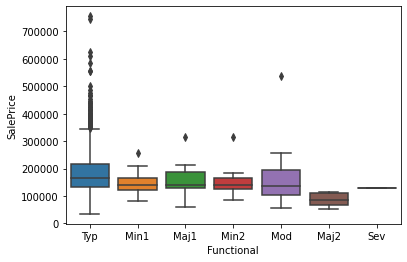

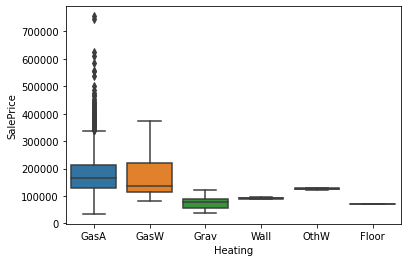

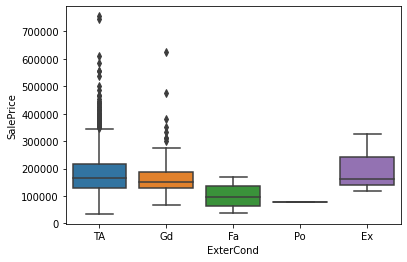

In [448]:
'''
Functional - рейтинг домашней функциональности
Heating - тип отопления
ExterCond - текущее состояние материала снаружи
'''
features = ['Functional', 'Heating', 'ExterCond']
for col in features:
    sns.boxplot(x=col, y='SalePrice', data=data)
    plt.show()

### Выводы
(объединение или удаление небольших столбцов не желательно)
1. Functional есть много выбросов для значения Typ
2. Heating так же присутствует много выбросов для первого значения.
3. ExterCond есть выбросы у перввых двух категорий